## importowanie pakietów

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

## Tworzenie obserwacji

In [17]:
S1 = np.array([[4,2],[2,4]])
S2 = np.array([[4,2],[2,4]])

m1 = np.array([-1,-1])
m2 = np.array([2,2])

n1 = 30
n2 = 20

X1 = pd.DataFrame(data=np.random.multivariate_normal(m1,S1,n1),columns=["x","y"])
X2 = pd.DataFrame(data=np.random.multivariate_normal(m2,S2,n2),columns=["x","y"])

X1['class'] = 1
X2['class'] = 2

data = pd.concat([X1,X2], ignore_index = True)

k = 5

## Porównanie między knn z sklearn a własną funkcją

In [18]:
def find_knn(data,row,k) :
    nodes = row.sort_values().head(k).index
    tab = data.iloc[nodes,data.columns == 'class']
    result = pd.crosstab(tab['class'],tab['class']).max().idxmax()
    return result
    

In [19]:
M = pd.DataFrame(data=squareform(pdist(data.iloc[:, 0:2])))

In [20]:
own = []
for index, row in M.iterrows():
    own.append(find_knn(data,row,k))

# own

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X=data.loc[:,data.columns != 'class'],y=data['class'])
knn_method = knn.predict(data.loc[:,data.columns != 'class'])

In [102]:
compare = pd.DataFrame(data={'own':own, 'sklearn':knn_method})
compare

own  sklearn
0     1        1
1     1        1
2     1        1
3     1        1
4     2        2
5     1        1
6     1        1
7     1        1
8     1        1
9     1        1
10    1        1
11    1        1
12    2        2
13    1        1
14    1        1
15    1        1
16    1        1
17    1        1
18    1        1
19    1        1
20    2        2
21    1        1
22    1        1
23    1        1
24    1        1
25    1        1
26    1        1
27    1        1
28    1        1
29    1        1
30    2        2
31    2        2
32    2        2
33    2        2
34    2        2
35    2        2
36    2        2
37    2        2
38    2        2
39    2        2
40    2        2
41    2        2
42    2        2
43    2        2
44    2        2
45    2        2
46    2        2
47    2        2
48    2        2
49    2        2

## Zależności (skuteczności, TP, TN) od k

In [43]:
k = []
k_score = []
TP = []
TN = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X=data.loc[:,data.columns != 'class'],y=data['class'])
    predict = knn.predict(data.loc[:,data.columns != 'class'])
    k_score.append(accuracy_score(predict,data['class']))
    CM = pd.crosstab(data['class'], predict)
    TN.append(CM.iloc[0,0])
    TP.append(CM.iloc[1,1])
    k.append(i)


skuteczność

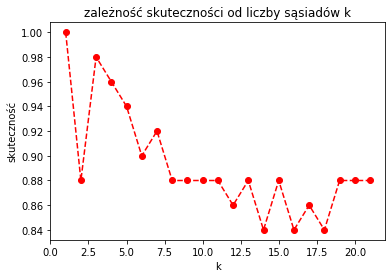

In [62]:
fig1 = plt.plot(k,k_score,'ro', k, k_score, 'r--')
plt.xlabel('k')
plt.ylabel('skuteczność')
plt.title('zależność skuteczności od liczby sąsiadów k')
plt.show()

TN

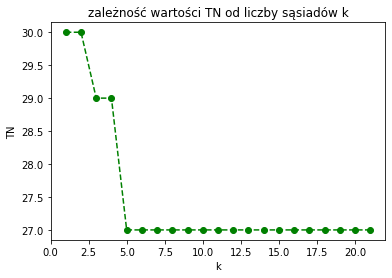

In [64]:
fig2 = plt.plot(k,TN,'go',k,TN,'g--')
plt.xlabel('k')
plt.ylabel('TN')
plt.title('zależność wartości TN od liczby sąsiadów k')
plt.show()

TP

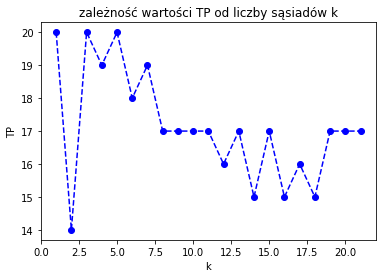

In [65]:
fig1 = plt.plot(k,TP,'bo',k,TP,'b--')
plt.xlabel('k')
plt.ylabel('TP')
plt.title('zależność wartości TP od liczby sąsiadów k')
plt.show()

## Ze zbiorem testowym

Losowanie 10 obserwacji z klasy 1 i 5 obserwacji z klasy 2. Wykorzystanie takiego zbioru jako zbiór testowy. Wyznaczenie skuteczności, TN i TP. Uśrednienie po 10 losowaniach i wykreślenie wykresów 

In [112]:
k = []
k_score = []
TP = []
TN = []
for i in range(0,21):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X=data.loc[:,data.columns != 'class'],y=data['class'])
    for t in range(10):
        dataTest = pd.concat([X1.sample(10),X2.sample(5)], ignore_index = True)
        predict = knn.predict(dataTest.loc[:,dataTest.columns != 'class'])
        CM = pd.crosstab(dataTest['class'], predict)
        if( t == 0):
            k_score.append(accuracy_score(predict,dataTest['class']) /10 )
            TN.append(CM.iloc[0,0]/10)
            TP.append(CM.iloc[1,1]/10)
        else:
            k_score[i] += accuracy_score(predict,dataTest['class'])/10
            TN[i] += CM.iloc[0,0]/10
            TP[i] += CM.iloc[1,1]/10
    k.append(i+1)
         

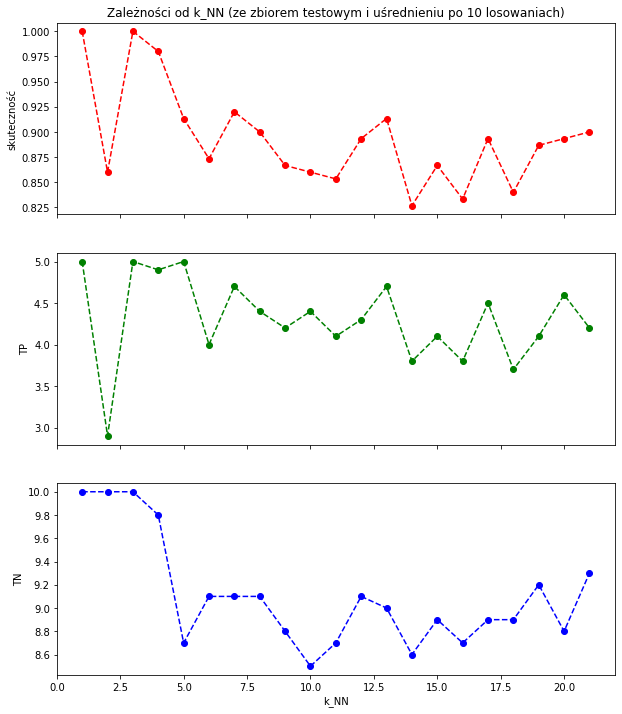

In [114]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10, 12)
ax[0].plot(k, k_score, 'ro', k, k_score, 'r--')
ax[0].label_outer()
ax[0].set(title='Zależności od k_NN (ze zbiorem testowym i uśrednieniu po 10 losowaniach)', ylabel='skuteczność')

ax[1].plot(k, TP, 'go',k,TP,'g--')
ax[1].label_outer()
ax[1].set(ylabel='TP')

ax[2].plot(k, TN, 'bo',k,TN,'b--')
ax[2].label_outer()
ax[2].set(xlabel='k_NN', ylabel='TN')
plt.show()